In [1]:
import sys
import numpy as np
%matplotlib qt
from matplotlib import pyplot as plt

In [2]:
def dynamic_print(data):
    sys.stdout.write("\r\x1b[K" + data)
    sys.stdout.flush()

In [3]:
def get_random_points(mean, std_dev, n):
    return np.random.normal(loc=mean, scale=std_dev, size=n)

In [4]:
def get_data(data_points, slope, bias, variance):
    X = np.linspace(0, data_points)
    error = get_random_points(mean=0, std_dev=variance, n=len(X))
    Y = ((X*slope) + bias) + error
    return X, Y

In [5]:
def absorb_bias(x):
    new_x = list()
    for i in range(len(x)):
        data = [x[i], 1]
        new_x.append(data)
    return new_x

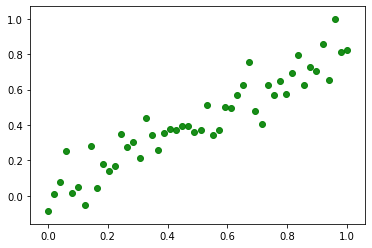

In [6]:
%matplotlib inline
DATA_POINTS = 900
SLOPE = 2
BIAS = 5
ERROR_VARIANCE = 200

X, Y = get_data(DATA_POINTS, SLOPE, BIAS, ERROR_VARIANCE)
X_normalized = X/X.max()
Y_normalized = Y/Y.max()
plt.scatter(X_normalized,Y_normalized,s=None, marker='o',color='g',edgecolors='g',alpha=0.9,label="Linear Relation")
plt.show()
X_normalized = absorb_bias(X_normalized)

$$w^T * x =\begin{cases}\text{positive values } & w^T* x \geq 0\\\text{negative values } & w^T* x <  0\end{cases}$$

In [7]:
def decision_rule(w, x):
    return np.dot(w, x)

$$\text{squared_loss = }((w^T* x) - y)^2$$

In [8]:
def squared_loss(w, x, y):
    return np.square(decision_rule(w, x) - y)

$$\text{absolute_loss = }d * ((|(w^T* x) - y|) - \frac{d}{2}) $$

In [9]:
def absolute_loss(w, x, y, d):
    return d * (np.abs(decision_rule(w, x) - y) - d/2)

$$Loss =\begin{cases}squared loss & (|w^T* x|) - y  < delta\\absolute loss &otherwise\end{cases}$$

In [10]:
def loss(w, x, y, delta):
    if np.abs(decision_rule(w, x) - y) < delta:
        return squared_loss(w, x, y)
    else:
        return absolute_loss(w, x, y, delta)

$$\text{squared_gradient = }2*(((w^T* x) - y) *  \vec{x})$$

In [11]:
def squared_gradient(w, x, y):
    return 2 * np.multiply((decision_rule(w, x) - y), x)

$$gradient = \frac{ \parallel w^T* x - y \parallel }{w^T* x - y} $$

In [12]:
def absolute_gradient(w, x, y):
    decision = decision_rule(w, x) - y
    if decision > 0:
        return 1
    elif decision < 0:
        return -1

$$gradient =\begin{cases}\text{squared_gradient} &(|w^T* x|) - y  < delta\\\text{absolute_gradient} & otherwise\end{cases}$$

In [13]:
def gradient(w, x, y, delta):
    if np.abs(decision_rule(w, x) - y) < delta:
        return squared_gradient(w, x, y)
    else:
        return delta * absolute_gradient(w, x, y)

In [14]:
def train(w, lr, delta, num_iter):
    for num_iter in range(num_iter):
        loss_iter = list()
        for iterator in range(len(X)):
            x = X_normalized[iterator]
            y = Y_normalized[iterator]
            w -= lr * gradient(w, x, y, delta)
            loss_iter.append(loss(w, x, y, delta))
        dynamic_print("Step: {} Loss : {} W: {}".format(num_iter+1, np.array(loss_iter).mean(), w))
    print("\nTraining Complete")
    return w

Term $delta$ is the where the loss switches from *absolute_loss* to *squared_Loss*, So whenever *absolute_loss* goes below $delta$, *squared_Loss* gets active

In [15]:
W = train(np.array([0.0, 0.0]), 0.001, 3, 50000)

Step: 50000 Loss : 0.00797464648862367 W: [0.81306334 0.01502229]
Training Complete


In [16]:
%matplotlib inline
def slope_intercept(w):
    a, b = tuple(w)
    return a, b


def plt_decision_boundary(w):
    slope, intercept = slope_intercept(w)

    x = np.linspace(0, DATA_POINTS)
    y = slope * x + intercept
    plt.plot(x/x.max(), y/y.max(), "-r", label="decision boundary")
    plt.scatter(X/X.max(), Y/Y.max(), marker="o")
    plt.title("Graph of Decision Boundary")
    plt.xlabel("x", color="#1C2833")
    plt.ylabel("y", color="#1C2833")
    plt.legend(loc="upper left")

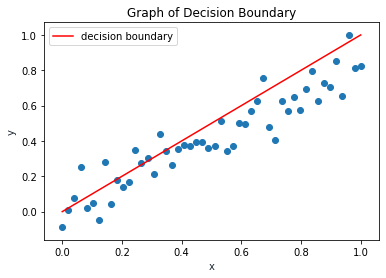

In [17]:
plt_decision_boundary(W)